In [2]:
#Importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Loading the data set
df= pd.read_csv('Walmart.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [4]:
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


# **Data Pre Processing**

In [5]:
#checking for Null Values
df.isnull().sum()

,0
Store,0
Date,0
Weekly_Sales,0
Holiday_Flag,0
Temperature,0
Fuel_Price,0
CPI,0
Unemployment,0


In [6]:
#Checking for duplicate values

df.duplicated().sum()

0

In [7]:
#changing Date column from object to datetime

#df['Date']=pd.to_datetime(df['Date'])
df['Date']=pd.to_datetime(df['Date'] , format='%d-%m-%Y')
df['Date']

,Date
0,2010-02-05
1,2010-02-12
2,2010-02-19
3,2010-02-26
4,2010-03-05
...,...
6430,2012-09-28
6431,2012-10-05
6432,2012-10-12
6433,2012-10-19


In [8]:
df.columns

Index(['Store', 'Date', 'Weekly_Sales', 'Holiday_Flag', 'Temperature',
       'Fuel_Price', 'CPI', 'Unemployment'],
      dtype='object')

In [9]:
col = ['Store','Weekly_Sales','Temperature','Fuel_Price','CPI','Unemployment']
col

['Store', 'Weekly_Sales', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment']

In [10]:
df['Holiday_Flag'] = df['Holiday_Flag'].apply(bool)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   int64         
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   float64       
 3   Holiday_Flag  6435 non-null   bool          
 4   Temperature   6435 non-null   float64       
 5   Fuel_Price    6435 non-null   float64       
 6   CPI           6435 non-null   float64       
 7   Unemployment  6435 non-null   float64       
dtypes: bool(1), datetime64[ns](1), float64(5), int64(1)
memory usage: 358.3 KB


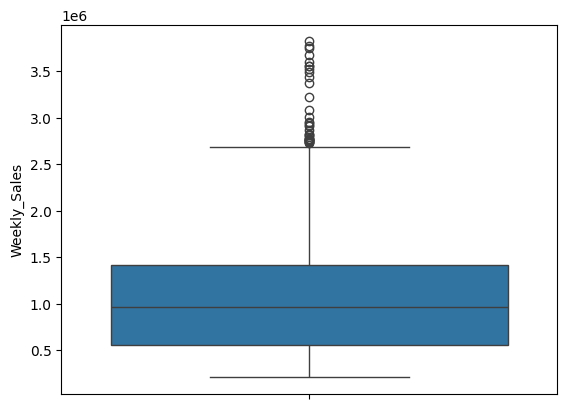

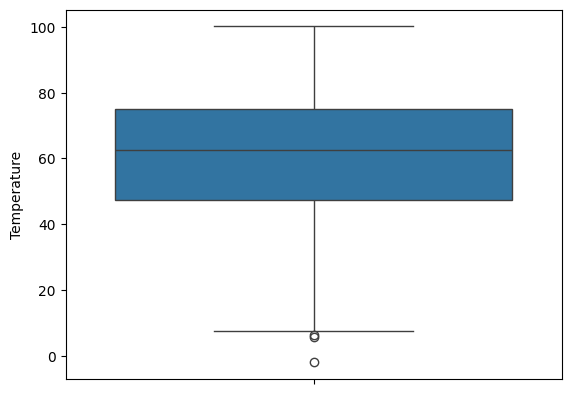

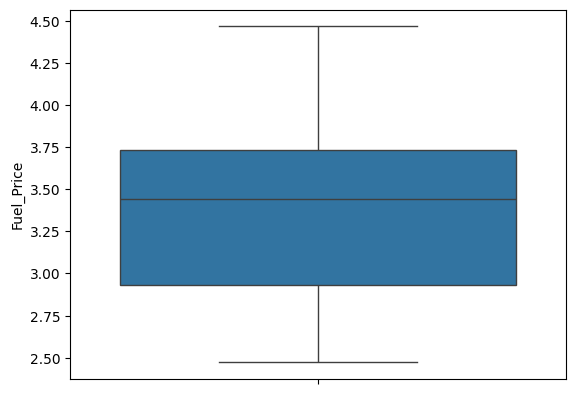

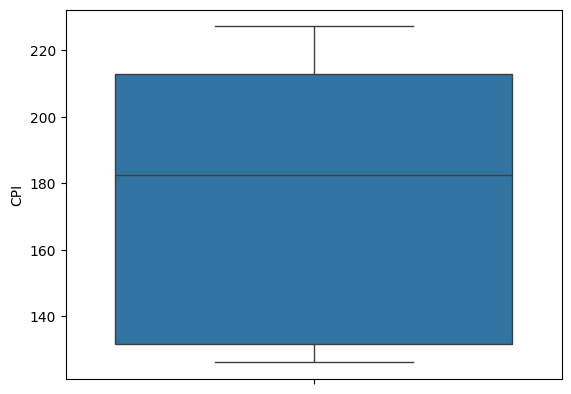

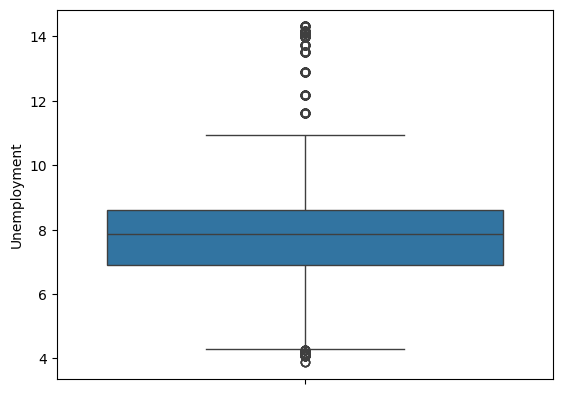

In [12]:
#Checking for outliers
for i in df.columns:
  if df[i].dtype == 'float64':
    plt.figuresize=(2,3)
    sns.boxplot(df[i])
    plt.show()

In [13]:
# Removing the outliers
for i in df.columns:
  if df[i].dtype == 'float64':
    q1 = df[i].quantile(0.25)
    q3 = df[i].quantile(0.75)
    iqr = q3 - q1
    uf = q3 + (1.5 * iqr)
    lf = q1 - (1.5 * iqr)
    df = df[(df[i] >= lf) & (df[i] <= uf)]

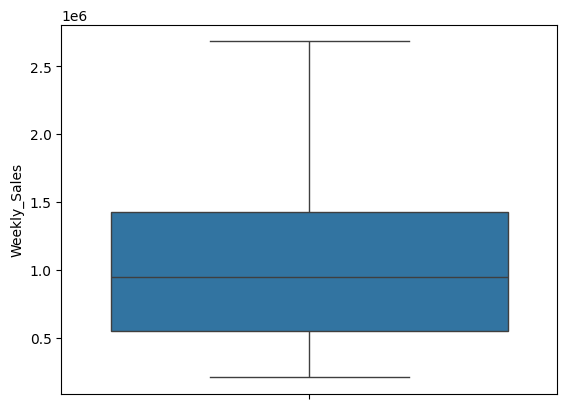

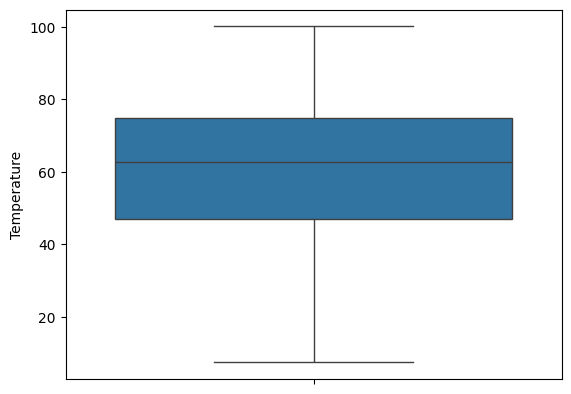

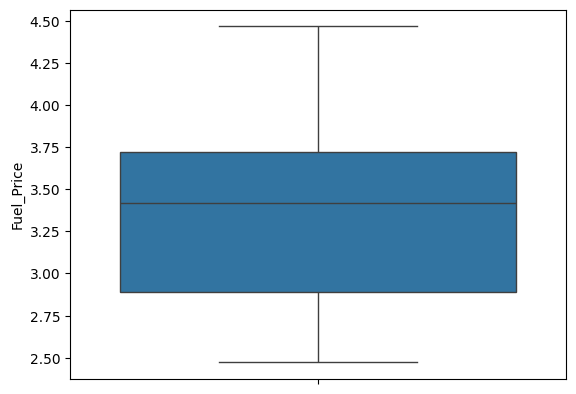

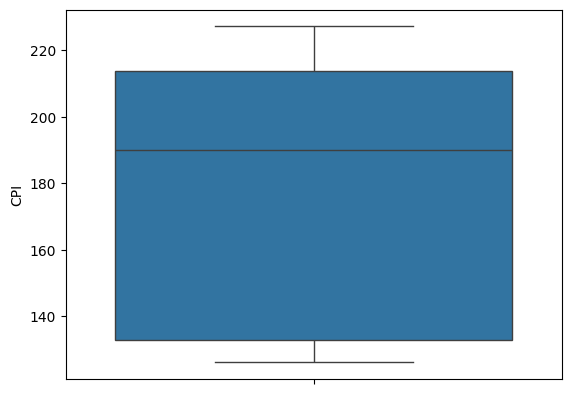

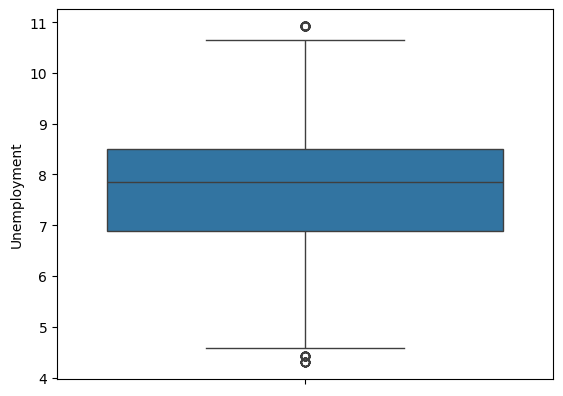

In [14]:
#Checking to see whether the outliers are removed

for i in df.columns:
  if df[i].dtype == 'float64':
    plt.figuresize=(2,3)
    sns.boxplot(df[i])
    plt.show()

# **EDA process**

In [15]:
df.head(5)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,2010-02-05,1643690.90,False,42.31,2.572,211.096358,8.106
1,1,2010-02-12,1641957.44,True,38.51,2.548,211.242170,8.106
2,1,2010-02-19,1611968.17,False,39.93,2.514,211.289143,8.106
3,1,2010-02-26,1409727.59,False,46.63,2.561,211.319643,8.106
4,1,2010-03-05,1554806.68,False,46.50,2.625,211.350143,8.106


In [16]:
# As per requirement the weekly sales is the target value, lets find how each column is related with the target value.

In [17]:
# Date and Weekly Sales
df['Month'] = df['Date'].dt.to_period('M')

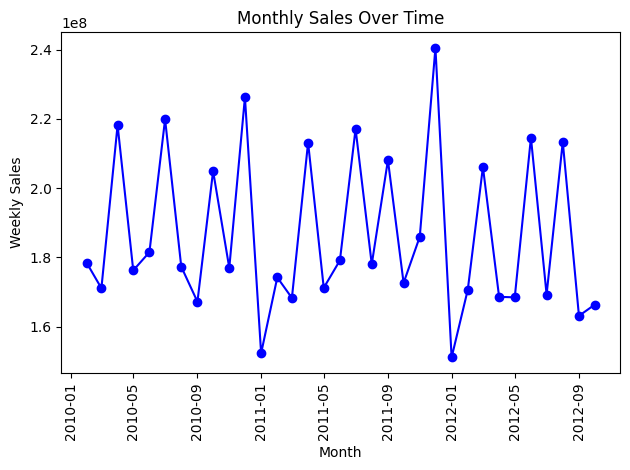

In [18]:
monthly_sales = df.groupby('Month')['Weekly_Sales'].sum().reset_index()

# Convert Month back to a datetime for better visualization
monthly_sales['Month'] = monthly_sales['Month'].dt.to_timestamp()

plt.plot(monthly_sales['Month'], monthly_sales['Weekly_Sales'], label='Weekly Sales', color='blue', marker='o')
plt.xlabel('Month')
plt.ylabel('Weekly Sales')
plt.title('Monthly Sales Over Time')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [19]:
df['Year'] = df['Date'].dt.to_period("Y")

df_year_sales = df.groupby('Year')['Weekly_Sales'].sum().reset_index()

<Axes: xlabel='Year', ylabel='Weekly_Sales'>

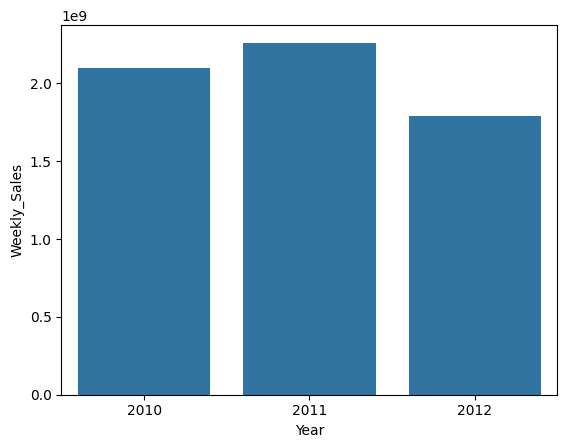

In [20]:
sns.barplot(x='Year',y='Weekly_Sales',data=df_year_sales)

**Sales were notably higher in 2011, particularly peaking between October 2011 and January 2012.**

***Store***

In [21]:
# Store and Weekly sales

df_store_sales = df.groupby('Store')['Weekly_Sales'].sum().reset_index()
df_store_sales

,Store,Weekly_Sales
0,1,2.224028e+08
1,2,2.687221e+08
2,3,5.758674e+07
3,4,2.446487e+08
4,5,4.547569e+07
5,6,2.210286e+08
6,7,8.104025e+07
7,8,1.299512e+08
8,9,7.778922e+07
9,10,2.556789e+08


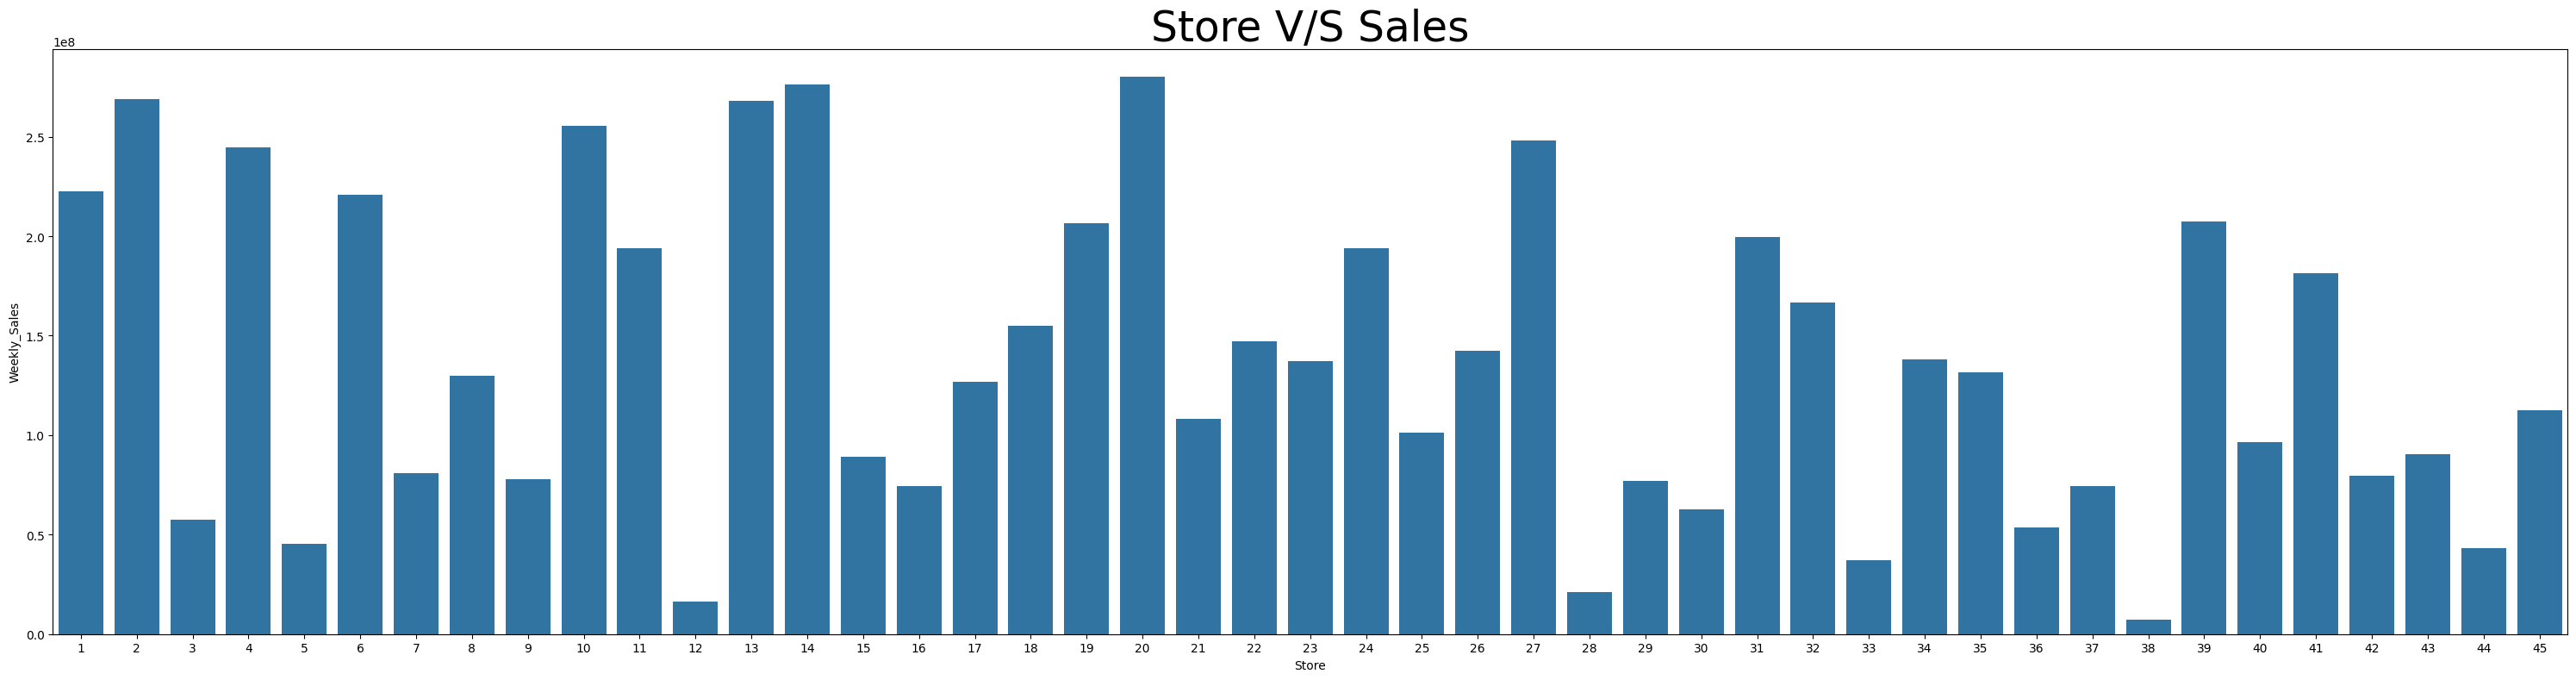

In [22]:
#Visualising the relation

plt.figure(figsize=(30,8))
sns.barplot(x='Store',y='Weekly_Sales',data=df_store_sales)
plt.title('Store V/S Sales',fontsize=35)
plt.tight_layout()
plt.show()

In [23]:
#Categorizing all data for better understanding

#Using bins and labels to categorize TEMPERATURE,FUEL_PRICE,UMEMPLOYEMENT_RATE and CPI

***Temperature***

In [24]:
df['Temperature'].min() # Minimum Temp

7.46

In [25]:
df['Temperature'].max() #Maximum Temp

100.14

In [26]:
# Intialising bins and labels

bins = [0, 32, 50, 70, 85, 100]
labels = ['Very Cold (0-32)', 'Cold (32-50)', 'Mild (50-70)', 'Warm (70-85)', 'Hot (85-100)']

# Categorize the temperatures
df['Categorized_Temps'] = pd.cut(df['Temperature'], bins=bins, labels=labels)


<ipython-input-28-cefd944b7146>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_temp_sales = df.groupby('Categorized_Temps')['Weekly_Sales'].sum().reset_index()


<Axes: xlabel='Categorized_Temps', ylabel='Weekly_Sales'>

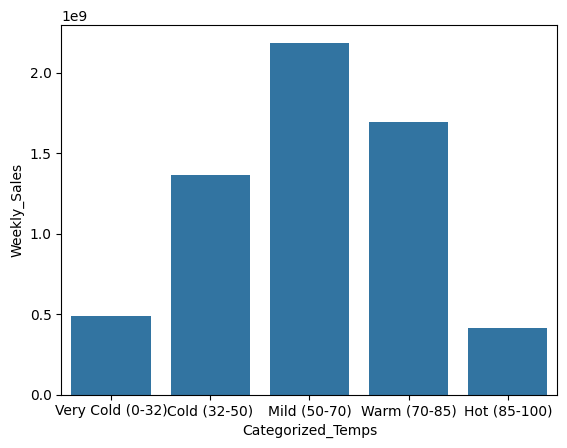

In [28]:
df_temp_sales = df.groupby('Categorized_Temps')['Weekly_Sales'].sum().reset_index()

# Plotting the weekly sales distribution on barplot

sns.barplot(x='Categorized_Temps',y='Weekly_Sales',data=df_temp_sales)

From the above graph, it reveals that
1. sales performance is **notably stronger** during **mild to warm** temperature ranges.
2. sales **decline** during **very cold and hot** temperatures,

indicating that **consumer shopping behavior is influenced by weather conditions**

***Holiday***

In [29]:
df['Holiday_Flag'].value_counts()

,count
Holiday_Flag,
False,5508
True,409


<Axes: xlabel='Holiday_Flag', ylabel='Weekly_Sales'>

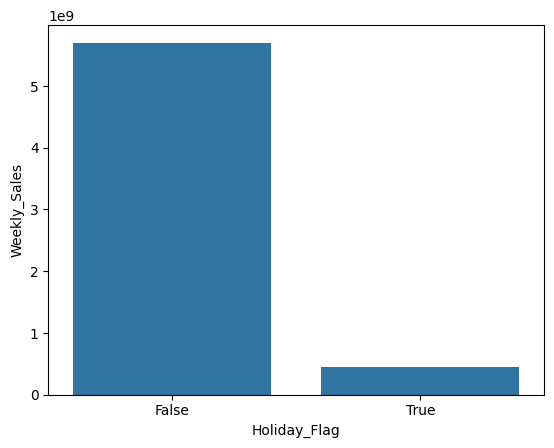

In [30]:
df_Holiday_Sales = df.groupby('Holiday_Flag')['Weekly_Sales'].sum().reset_index()

sns.barplot(x='Holiday_Flag',y='Weekly_Sales',data=df_Holiday_Sales)

Sales tend to be **significantly higher** on **regular days** compared to holiday periods.

***Fuel Price***

In [31]:
df['Fuel_Price'].min()

2.472

In [32]:
df['Fuel_Price'].max()

4.468

In [33]:
bins = [2.00, 2.50, 3.00, 3.50, 4.00, 4.50]
labels = ['Low (2.0 - 2.5)', 'Moderate (2.5 - 3)', 'Average (3 - 3.5)', 'High (3.5 - 4)','Very High (4 - 4.5)']

# Categorize the fuel prices
df['categorized_fuel'] = pd.cut(df['Fuel_Price'], bins=bins, labels=labels, right=False)

<ipython-input-34-6d6540a87a17>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_fuel_sales = df.groupby('categorized_fuel')['Weekly_Sales'].sum().reset_index()


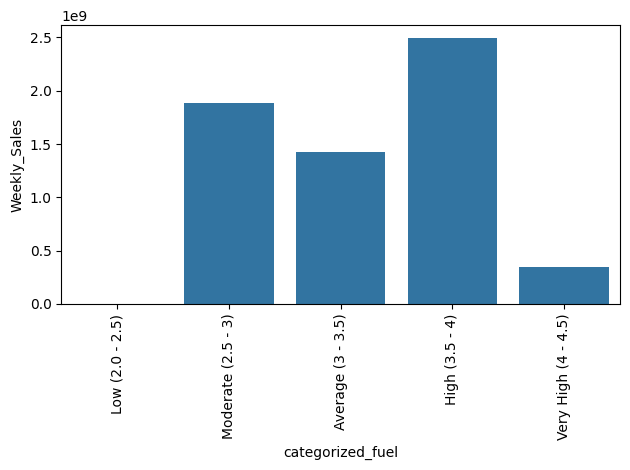

In [34]:
df_fuel_sales = df.groupby('categorized_fuel')['Weekly_Sales'].sum().reset_index()

# Plotting the weekly sales distribution on barplot

sns.barplot(x='categorized_fuel',y='Weekly_Sales',data=df_fuel_sales)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

Sales are **notably higher** when fuel prices range from 3.50  to $4.00.

***UNEMPLOYMENT***

In [35]:
df['Unemployment'].min() # Cheking the lower band of unemp rate

4.308

In [36]:
df['Unemployment'].max() # Cheking the Upper band of unemp rate

10.926

In [37]:
bins=[4.3,6.3,8.3,10.9]
labels=['Low (4-6)',' Moderate (6-8)','High (8-11)']
df['categorized_unemply']= pd.cut(df['Unemployment'],bins=bins,labels=labels) # creating the new column in the dataframe

<ipython-input-38-7c288193e9aa>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_UnEmp_Sales = df.groupby('categorized_unemply')['Weekly_Sales'].sum().reset_index() # Creating separte dataframe for the sales and UnEmp rate


<Axes: xlabel='categorized_unemply', ylabel='Weekly_Sales'>

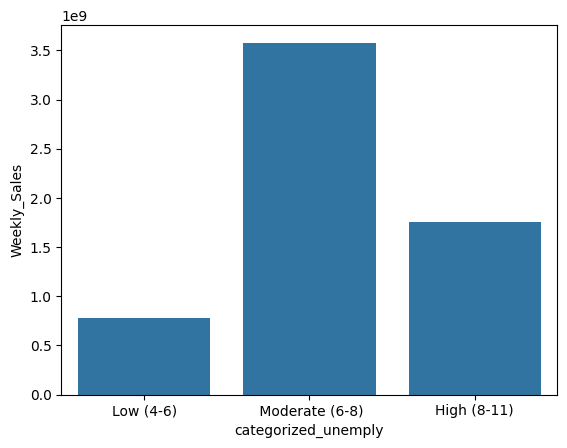

In [38]:
df_UnEmp_Sales = df.groupby('categorized_unemply')['Weekly_Sales'].sum().reset_index() # Creating separte dataframe for the sales and UnEmp rate
sns.barplot(x='categorized_unemply',y='Weekly_Sales',data=df_UnEmp_Sales)

***Sales tend to be comparatively higher during periods of elevated unemployment, while they decrease when unemployment rates are low.***

***CPI - CONSUMER PRICE INDEX***

In [39]:
df['CPI'].min()

126.064

In [40]:
df['CPI'].max()

227.2328068

In [41]:
bins=[125,155,185,215,245]

labels=['125-155','156-185','186-215','216-245']

df['categorized_cpi']= pd.cut(df['CPI'],bins=bins,labels=labels)

<ipython-input-42-8fe1b226204f>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_cpi_Sales = df.groupby('categorized_cpi')['Weekly_Sales'].sum().reset_index()


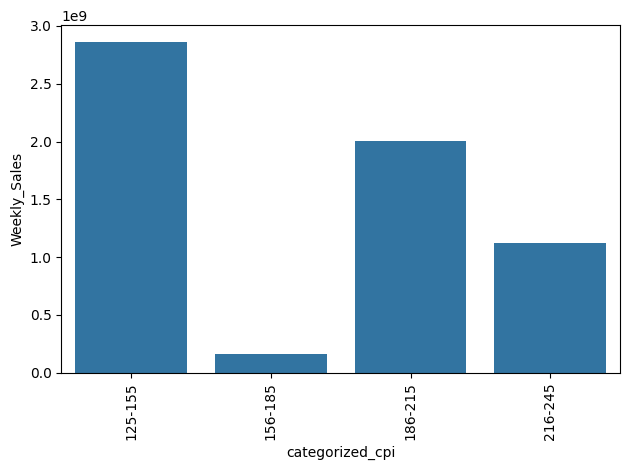

In [42]:
df_cpi_Sales = df.groupby('categorized_cpi')['Weekly_Sales'].sum().reset_index()

sns.barplot(x='categorized_cpi',y='Weekly_Sales',data=df_cpi_Sales)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

***When the CPI is in a lower range, it often correlates with higher sales ***

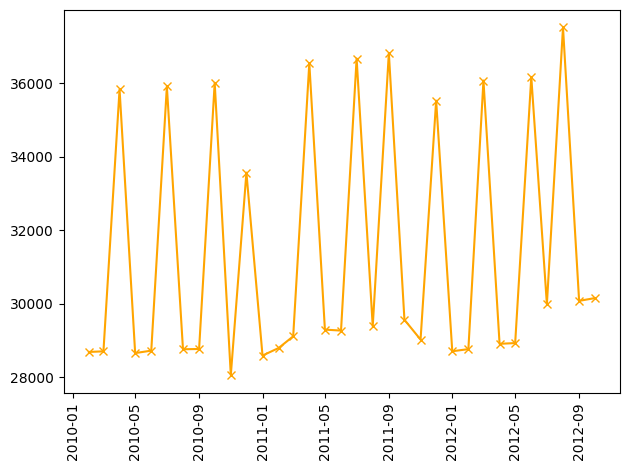

In [43]:
monthly_cpi = df.groupby('Month')['CPI'].sum().reset_index()

monthly_cpi['Month'] = monthly_cpi['Month'].dt.to_timestamp()

plt.plot(monthly_cpi['Month'], monthly_cpi['CPI'], label='CPI', color='orange', marker='x')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# **QUESTIONS**

A) If the weekly sales are affected by the unemployment rate, if yes - which stores are suffering the most?

In [44]:
df_high_unemp = df[df['categorized_unemply'] == 'High (8-11)'].groupby('Store')['Weekly_Sales'].sum().reset_index()
df_high_unemp

,Store,Weekly_Sales
0,2,1.594211e+07
1,4,1.582439e+07
2,7,5.567269e+07
3,10,1.309794e+08
4,12,3.850386e+06
5,13,1.532884e+07
6,14,2.761276e+08
7,15,4.955613e+06
8,18,1.375821e+08
9,19,1.165713e+07


In [45]:
df_Top = df_high_unemp.sort_values(by='Weekly_Sales',ascending=False)
df_Top.head(5)

,Store,Weekly_Sales
6,14,2.761276e+08
20,34,1.382498e+08
8,18,1.375821e+08
21,35,1.315207e+08
3,10,1.309794e+08


b)  If the weekly sales show a seasonal trend, when and what could be the reason?

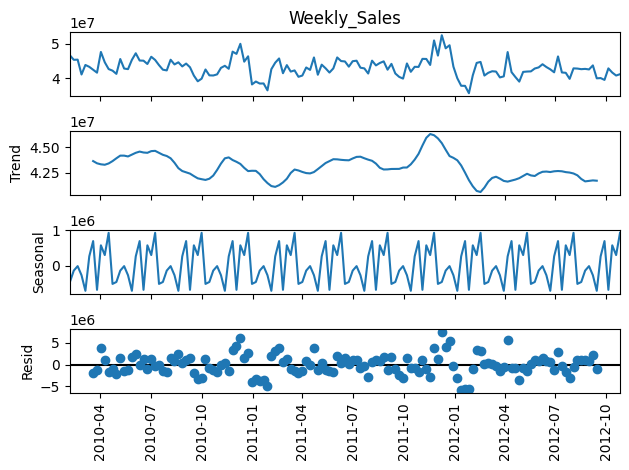

In [46]:
df_seasonal = df.groupby(df['Date'])['Weekly_Sales'].sum().reset_index()
df_seasonal.set_index('Date',inplace=True)

from statsmodels.tsa.seasonal import seasonal_decompose
decomposed = seasonal_decompose(df_seasonal['Weekly_Sales'],period=12)
decomposed.plot()
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

***A notable spike in the trend is observed between October 2011 and January 2012. This increase may be attributed to a significant decline in the Consumer Price Index (CPI) and inflation rate beginning in early October. Additionally, this period coincides with major sales events such as Black Friday, and the Christmas holidays, which likely contributed to the trend.***

c) Does temperature affect the weekly sales in any manner?

<ipython-input-47-6812fcbb62af>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_temp_sales = df.groupby('Categorized_Temps')['Weekly_Sales'].sum().reset_index()


<Axes: xlabel='Categorized_Temps', ylabel='Weekly_Sales'>

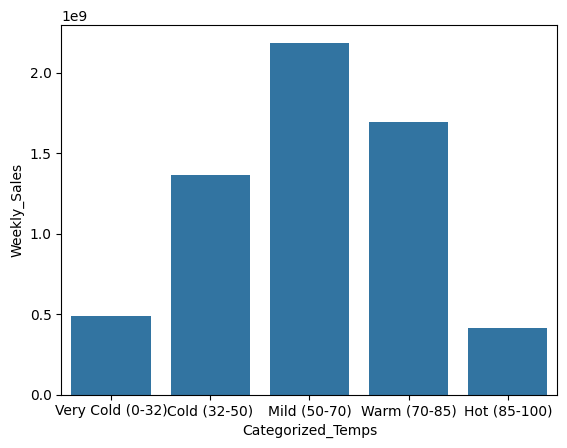

In [47]:
df_temp_sales = df.groupby('Categorized_Temps')['Weekly_Sales'].sum().reset_index()

sns.barplot(x='Categorized_Temps',y='Weekly_Sales',data=df_temp_sales)

From the above graph, it reveals that
1. sales performance is **notably stronger** during **mild to warm** temperature ranges.
2. sales **decline** during **very cold and hot** temperatures,

indicating that **consumer shopping behavior is influenced by weather conditions**

d) How is the Consumer Price index affecting the weekly sales of various stores?

In [48]:
df_cpi_index = df.groupby('Store')[['CPI', 'Weekly_Sales']].sum().reset_index()
df_cpi_index

,Store,CPI,Weekly_Sales
0,1,30887.555523,2.224028e+08
1,2,30407.358210,2.687221e+08
2,3,31372.988971,5.758674e+07
3,4,15405.618756,2.446487e+08
4,5,30968.878137,4.547569e+07
5,6,30897.190674,2.210286e+08
6,7,27502.224152,8.104025e+07
7,8,31379.780750,1.299512e+08
8,9,31406.616557,7.778922e+07
9,10,17760.839453,2.556789e+08


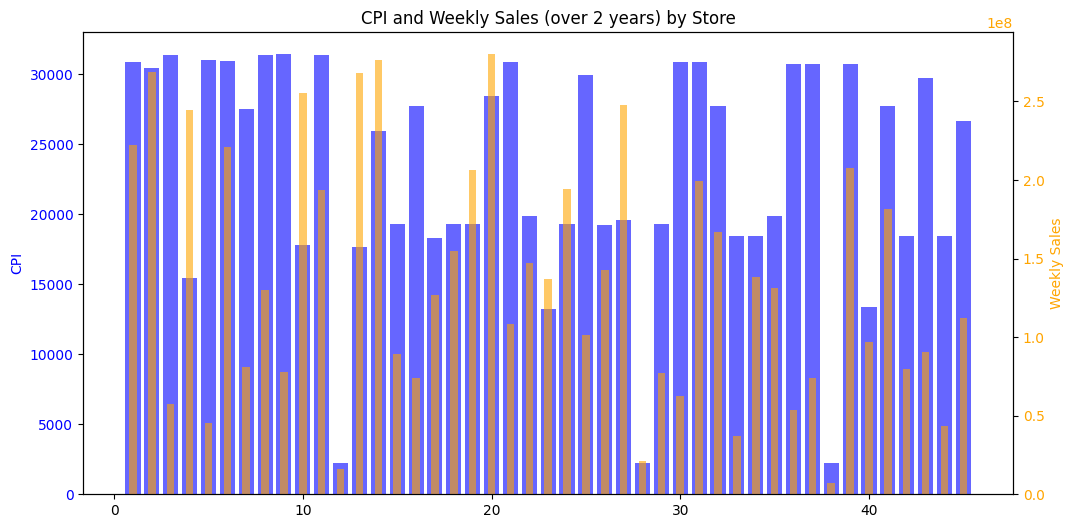

In [49]:
plt.figure(figsize=(12, 6))

# Create the first y-axis for CPI
ax1 = plt.gca()  # Get current axis
ax1.bar(df_cpi_index['Store'], df_cpi_index['CPI'], color='blue', alpha=0.6, label='CPI')
ax1.set_ylabel('CPI', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Create the second y-axis for Weekly Sales
ax2 = ax1.twinx()  # Create a second y-axis sharing the same x-axis
ax2.bar(df_cpi_index['Store'], df_cpi_index['Weekly_Sales'], color='orange', alpha=0.6, label='Weekly Sales', width=0.4)
ax2.set_ylabel('Weekly Sales', color='orange')
ax2.tick_params(axis='y', labelcolor='orange')

plt.title('CPI and Weekly Sales (over 2 years) by Store')
plt.show()


In [50]:
df_cpi_sales = df.groupby(['Date','CPI'])['Weekly_Sales'].sum().reset_index()

<Axes: >

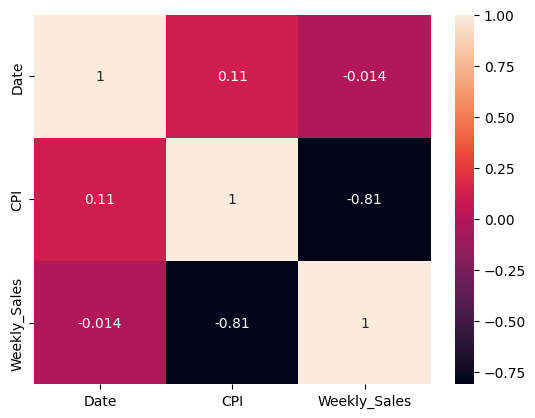

In [81]:
sns.heatmap(df_cpi_sales.corr(),annot=True)

***The negative correlation of -0.81 between CPI and weekly sales suggests that higher prices are associated with lower sales.***

e) Top performing stores according to the historical data.

In [51]:
df_store_sales = df.groupby('Store')['Weekly_Sales'].sum().reset_index()
df_store_sales

,Store,Weekly_Sales
0,1,2.224028e+08
1,2,2.687221e+08
2,3,5.758674e+07
3,4,2.446487e+08
4,5,4.547569e+07
5,6,2.210286e+08
6,7,8.104025e+07
7,8,1.299512e+08
8,9,7.778922e+07
9,10,2.556789e+08


In [52]:
df_top_stores = df_store_sales.sort_values(by='Weekly_Sales',ascending=False).head(5)
df_top_stores

,Store,Weekly_Sales
19,20,2.800237e+08
13,14,2.761276e+08
1,2,2.687221e+08
12,13,2.682025e+08
9,10,2.556789e+08


f) The worst performing store, and how significant is the difference between the highest and lowest performing stores.

In [53]:
df_least_stores = df_store_sales.sort_values(by='Weekly_Sales',ascending=True).head(5)
df_least_stores

,Store,Weekly_Sales
37,38,7347378.89
11,12,16386710.79
27,28,21106767.80
32,33,37160221.96
43,44,43293087.84


In [54]:
from scipy.stats import ttest_ind # Importing the ttest_ind , to determine if the difference in sales is statistically significant.
top_sales = df_top_stores['Weekly_Sales']
worst_sales = df_least_stores['Weekly_Sales']
t_statistic, p_value = ttest_ind(top_sales, worst_sales)

In [55]:
# Interpret results
if p_value < 0.05:
    print("There is a significant difference between top-performing and worst-performing stores.")
    print(f"P-value: {p_value}")
else:
    print("There is no significant difference between top-performing and worst-performing stores.")
    print(f"P-value: {p_value}")

There is a significant difference between top-performing and worst-performing stores.
P-value: 1.2148893706549416e-09



First Step


In [56]:
# Excluding all the varibales and considering the date and sales data for model building
df_model =df.groupby('Date')['Weekly_Sales'].sum().reset_index()

In [57]:
df_model.set_index('Date',inplace=True)

In [58]:
from statsmodels.tsa.stattools import adfuller   #Augumented -Dickey Fuller Test
test_result= adfuller(df_model)

In [59]:
pvalue = test_result[1]
pvalue

0.10183103022930273

In [60]:
if test_result[1] <= 0.05:
  print("Rejects the null hypothesis")
  print("Data has no unit root and is stationary")
else:
  print("Fail to reject the null hypothesis")
  print("Data has a unit root and is non-stationary.")

Fail to reject the null hypothesis
Data has a unit root and is non-stationary.


Text(0.5, 1.0, 'Rolling Mean & Standard Deviation (Logarithmic Scale)')

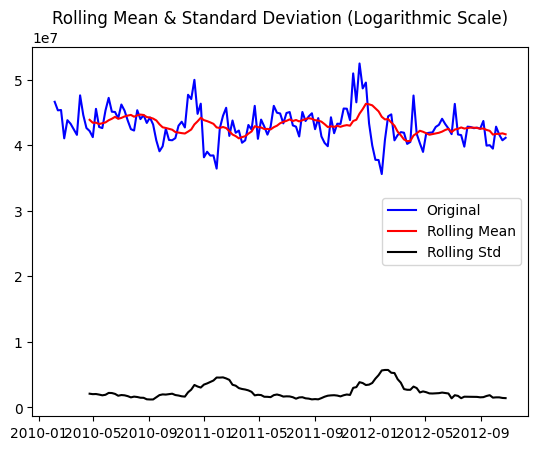

In [61]:
# Convert the data to stationary

# Selected  window to be 12 weeks to calculate quarterly sales, as this approach is beneficial for identifying future trends and
# is commonly used by many firms for quarterly reporting

mean_log = df_model.rolling(window=12).mean()
std_log = df_model.rolling(window=12).std()

plt.plot(df_model, color='blue', label='Original')
plt.plot(mean_log, color='red', label='Rolling Mean')
plt.plot(std_log, color='black', label='Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation (Logarithmic Scale)')

<Axes: xlabel='Date'>

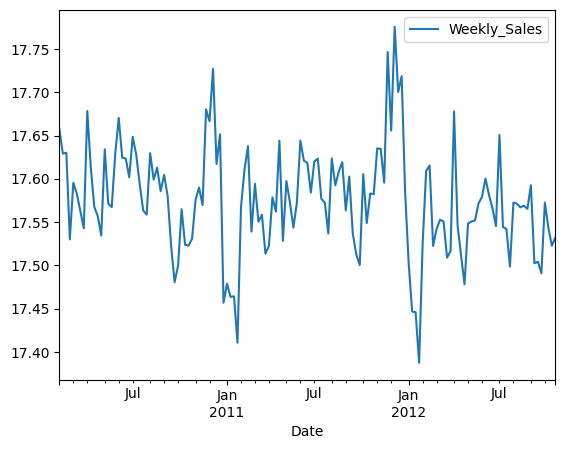

In [62]:
first_log = np.log(df_model)
first_log = first_log.dropna()
first_log.plot()

Text(0.5, 1.0, 'Rolling Mean & Standard Deviation (Logarithmic Scale)')

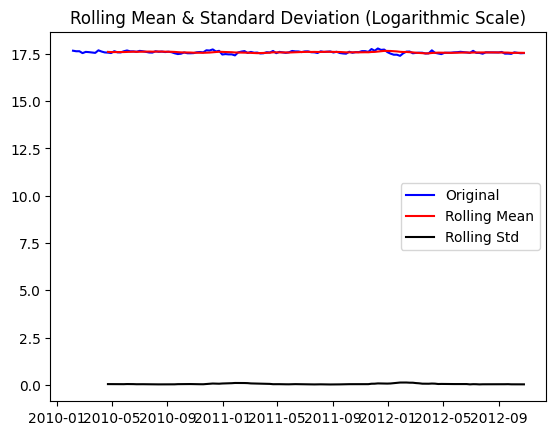

In [63]:
mean_log = first_log.rolling(window=12).mean()
std_log = first_log.rolling(window=12).std()

plt.plot(first_log, color='blue', label='Original')
plt.plot(mean_log, color='red', label='Rolling Mean')
plt.plot(std_log, color='black', label='Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation (Logarithmic Scale)')

In [64]:
new_df_model = first_log - mean_log
new_df_model = new_df_model.dropna()
new_df_model.head()

,Weekly_Sales
Date,
2010-04-23,-0.038626
2010-04-30,-0.050815
2010-05-07,0.048370
2010-05-14,-0.009513
2010-05-21,-0.016572


Text(0.5, 1.0, 'Rolling Mean & Standard Deviation (Logarithmic Scale)')

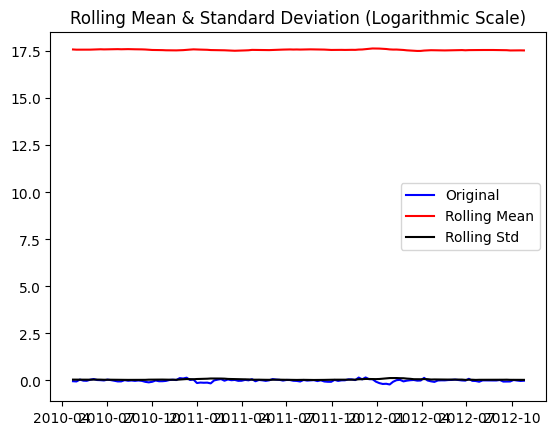

In [65]:
plt.plot(new_df_model, color='blue', label='Original')
plt.plot(mean_log, color='red', label='Rolling Mean')
plt.plot(std_log, color='black', label='Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation (Logarithmic Scale)')

In [66]:
result=adfuller(new_df_model)

In [67]:
p_value= result[1]
p_value

0.010945062808155022

In [68]:
if result[1] <= 0.05:
  print("Rejects the null hypothesis")
  print("Data has no unit root and is stationary")
else:
  print("Fail to reject the null hypothesis")
  print("Data has a unit root and is non-stationary.")

Rejects the null hypothesis
Data has no unit root and is stationary


# **MODEL BUILDING**




In [69]:
new_df_model

,Weekly_Sales
Date,
2010-04-23,-0.038626
2010-04-30,-0.050815
2010-05-07,0.048370
2010-05-14,-0.009513
2010-05-21,-0.016572
...,...
2012-09-28,-0.052413
2012-10-05,0.026812
2012-10-12,-0.002296


In [70]:
# train test split
train_size = int(len(new_df_model) * 0.8)
train_data = new_df_model[:train_size]
test_data = new_df_model[train_size:]

In [71]:
from sklearn.metrics import *
from statsmodels.tsa.statespace.sarimax import SARIMAX

#finding optimal values of p,d,q with itertools
import itertools
p=range(0,7)
d=range(1,2)
q=range(0,7)
pdq=list(itertools.product(p,d,q))
rmse = []
order1 =[]
for i in pdq:
    model = SARIMAX(train_data, order = i)
    model_fit = model.fit()
    pred = model_fit.predict(start = len(train_data), end= len(train_data)+len(test_data)-1)
    error = np.sqrt(mean_squared_error(test_data,pred))
    order1.append(i)
    rmse.append(error)

results = pd.DataFrame(index = order1, data = rmse, columns=['RMSE'])

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  

In [72]:
results.sort_values(by='RMSE',ascending=True)

,RMSE
"(5, 1, 3)",0.032154
"(6, 1, 4)",0.032833
"(1, 1, 3)",0.033191
"(0, 1, 4)",0.033264
"(1, 1, 4)",0.033469
"(0, 1, 3)",0.033490
"(6, 1, 5)",0.033739
"(2, 1, 4)",0.033929
"(2, 1, 3)",0.034134
"(3, 1, 4)",0.034302


In [73]:
sarimax_model = SARIMAX(train_data, order=(5,1,3), seasonal_order=(5,1,3,12))
sarimax_model = sarimax_model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [74]:
#predictions = sarimax_model.predict()
new_df_model

,Weekly_Sales
Date,
2010-04-23,-0.038626
2010-04-30,-0.050815
2010-05-07,0.048370
2010-05-14,-0.009513
2010-05-21,-0.016572
...,...
2012-09-28,-0.052413
2012-10-05,0.026812
2012-10-12,-0.002296


<Axes: xlabel='Date'>

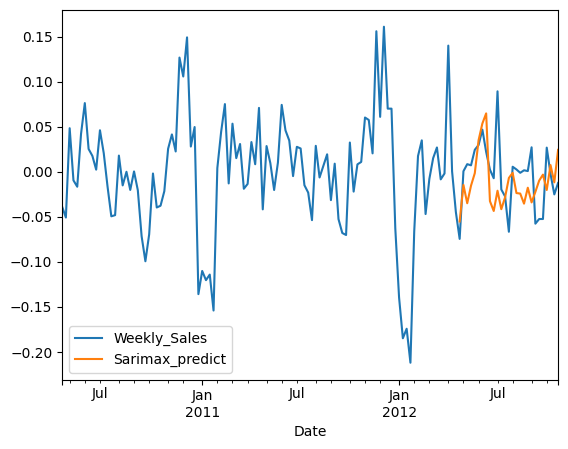

In [75]:
new_df_model['Sarimax_predict'] = sarimax_model.predict(start= len(train_data) ,end=len(train_data)+len(test_data)- 1)
new_df_model[['Weekly_Sales','Sarimax_predict']].plot()

In [76]:
forecast_steps = 12    # forecasting for next 12 weeks
forecast = sarimax_model.forecast(steps=forecast_steps)

In [77]:
end_date_actual_data = '2012-10-26'

forecast_start_date = pd.to_datetime(end_date_actual_data) + pd.DateOffset(weeks=0)
forecast_end_date = forecast_start_date + pd.DateOffset(weeks=len(forecast))
forecast_dates = pd.date_range(start=forecast_start_date, end=forecast_end_date, freq='W')

In [78]:
forecast_df = pd.DataFrame({'Date': forecast_dates, 'Forecasted_Sales': forecast})

In [79]:
forecast_df.set_index('Date',inplace=True)

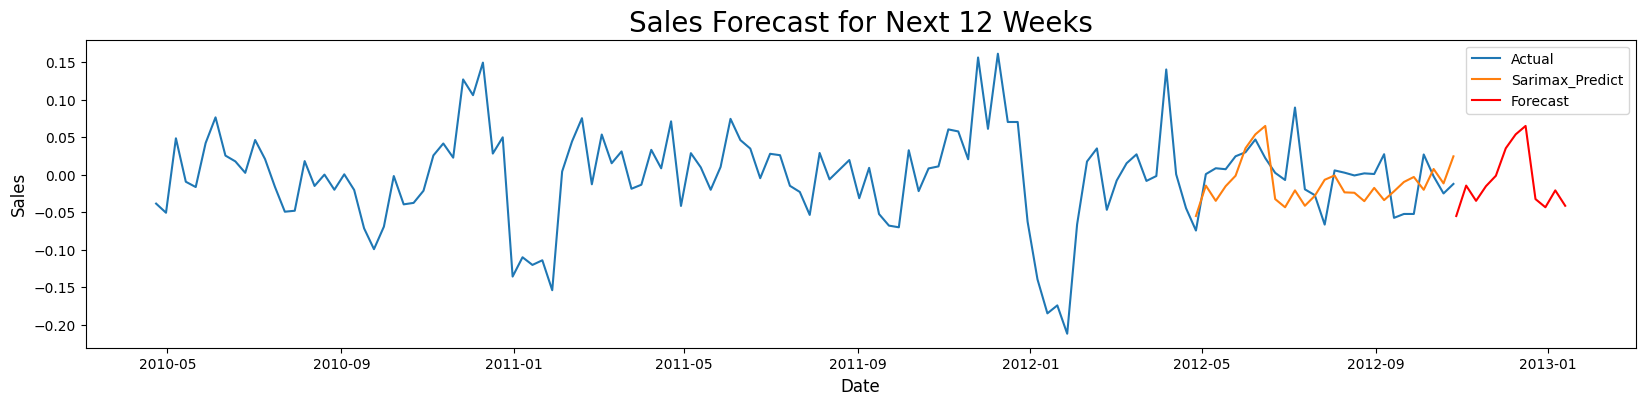

In [80]:
plt.figure(figsize=(20, 4))
plt.plot(new_df_model, label=('Actual','Sarimax_Predict'))
plt.plot(forecast_df, label='Forecast', color='red')
plt.title('Sales Forecast for Next 12 Weeks',fontsize=20)
plt.xlabel('Date',fontsize=12)
plt.ylabel('Sales',fontsize=12)
plt.legend()
plt.show()